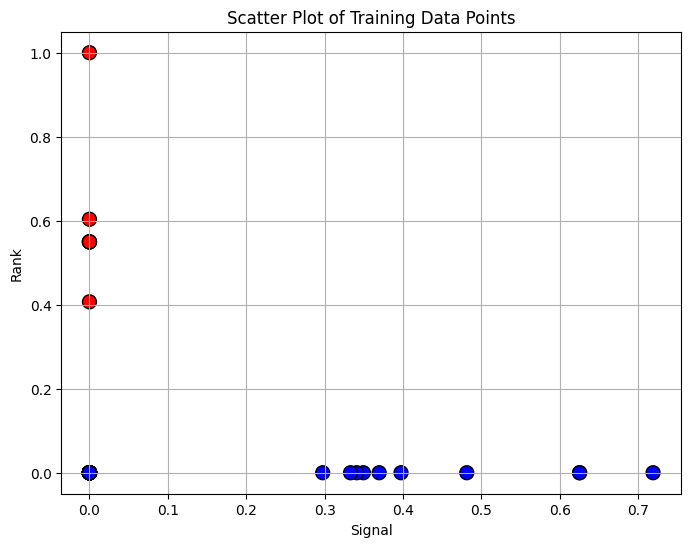

In [3]:
#a3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

def load_data(file_path):
    """Load dataset from an Excel file."""
    return pd.read_excel(file_path)

def preprocess_data(data, signal_col='signal', rank_col='rank'):
    """Extract features and create binary labels from the dataset."""
    signal_data = data[signal_col]
    rank_data = data[rank_col]
    
    # Combine the features into a single DataFrame
    X = pd.DataFrame({signal_col: signal_data, rank_col: rank_data})
    
    # Create binary labels based on the median of the 'rank' column
    y = (rank_data > rank_data.median()).astype(int)
    
    return X, y

def split_data(X, y, test_size=0.3, random_state=42):
    """Split the dataset into training and test sets."""
    return train_test_split(X, y, test_size=test_size, random_state=random_state)

def plot_training_data(X_train, y_train):
    """Plot the training data points with different colors based on class labels."""
    # Map classes to colors: 0 -> Blue, 1 -> Red
    colors = np.where(y_train == 0, 'blue', 'red')

    plt.figure(figsize=(8, 6))
    plt.scatter(X_train['signal'], X_train['rank'], c=colors, edgecolor='k', s=100)

    # Add plot labels and title
    plt.title('Scatter Plot of Training Data Points')
    plt.xlabel('Signal')
    plt.ylabel('Rank')
    plt.grid(True)

    # Show the plot
    plt.show()

def main():
    file_path = r"C:\\Users\\srivar\\Desktop\\Feature Extraction using TF-IDF.xlsx"
    
    # Load and preprocess data
    data = load_data(file_path)
    X, y = preprocess_data(data)
    
    # Split data
    X_train, X_test, y_train, y_test = split_data(X, y)
    
    # Plot the training data
    plot_training_data(X_train, y_train)

if __name__ == "__main__":
    main()


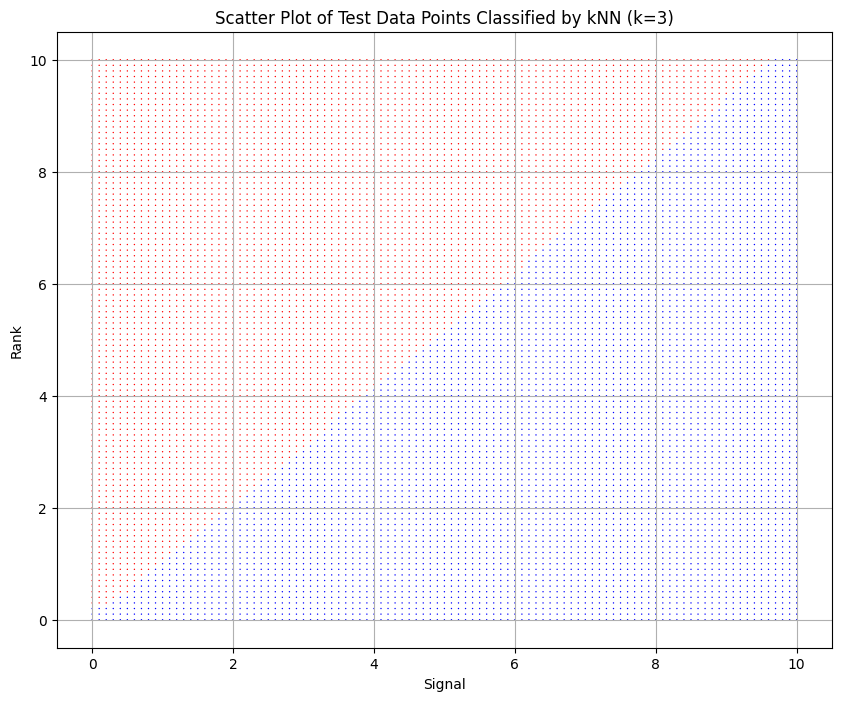

In [4]:
#a4
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

def load_data(file_path):
    """Load dataset from an Excel file."""
    return pd.read_excel(file_path, sheet_name='Sheet1')

def preprocess_data(data, signal_col='signal', rank_col='rank'):
    """Extract features and create binary labels."""
    signal_data = data[signal_col]
    rank_data = data[rank_col]
    
    # Combine the features into a single DataFrame
    X = pd.DataFrame({signal_col: signal_data, rank_col: rank_data})
    
    # Create binary labels
    y = (rank_data > rank_data.median()).astype(int)
    
    return X, y

def split_data(X, y, test_size=0.3, random_state=42):
    """Split the dataset into training and test sets."""
    return train_test_split(X, y, test_size=test_size, random_state=random_state)

def create_test_grid(start=0, end=10, step=0.1):
    """Generate a grid of test data points."""
    values = np.arange(start, end + step, step)
    grid = np.meshgrid(values, values)
    
    # Flatten the grid to create test points
    flat_signal = grid[0].flatten()
    flat_rank = grid[1].flatten()
    
    return pd.DataFrame({'signal': flat_signal, 'rank': flat_rank})

def train_knn(X_train, y_train, k=3):
    """Train the kNN classifier."""
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    return knn

def classify_test_data(knn, X_test_grid):
    """Classify the test data using the trained kNN classifier."""
    y_test_pred = knn.predict(X_test_grid)
    X_test_grid['predicted_class'] = y_test_pred
    return X_test_grid

def plot_classification(X_test_grid):
    """Plot the test data with predicted class colors."""
    colors = np.where(X_test_grid['predicted_class'] == 0, 'blue', 'red')

    plt.figure(figsize=(10, 8))
    plt.scatter(X_test_grid['signal'], X_test_grid['rank'], c=colors, s=1, edgecolor='none')
    plt.title('Scatter Plot of Test Data Points Classified by kNN (k=3)')
    plt.xlabel('Signal')
    plt.ylabel('Rank')
    plt.grid(True)
    plt.show()

def main():
    file_path = r"C:\\Users\\srivar\\Desktop\\Feature Extraction using TF-IDF.xlsx"
    
    # Load and preprocess data
    data = load_data(file_path)
    X, y = preprocess_data(data)
    
    # Split data
    X_train, X_test, y_train, y_test = split_data(X, y)
    
    # Create test grid
    X_test_grid = create_test_grid()
    
    # Train kNN classifier
    knn = train_knn(X_train, y_train)
    
    # Classify the test grid
    X_test_grid = classify_test_data(knn, X_test_grid)
    
    # Plot the classification results
    plot_classification(X_test_grid)

if __name__ == "__main__":
    main()


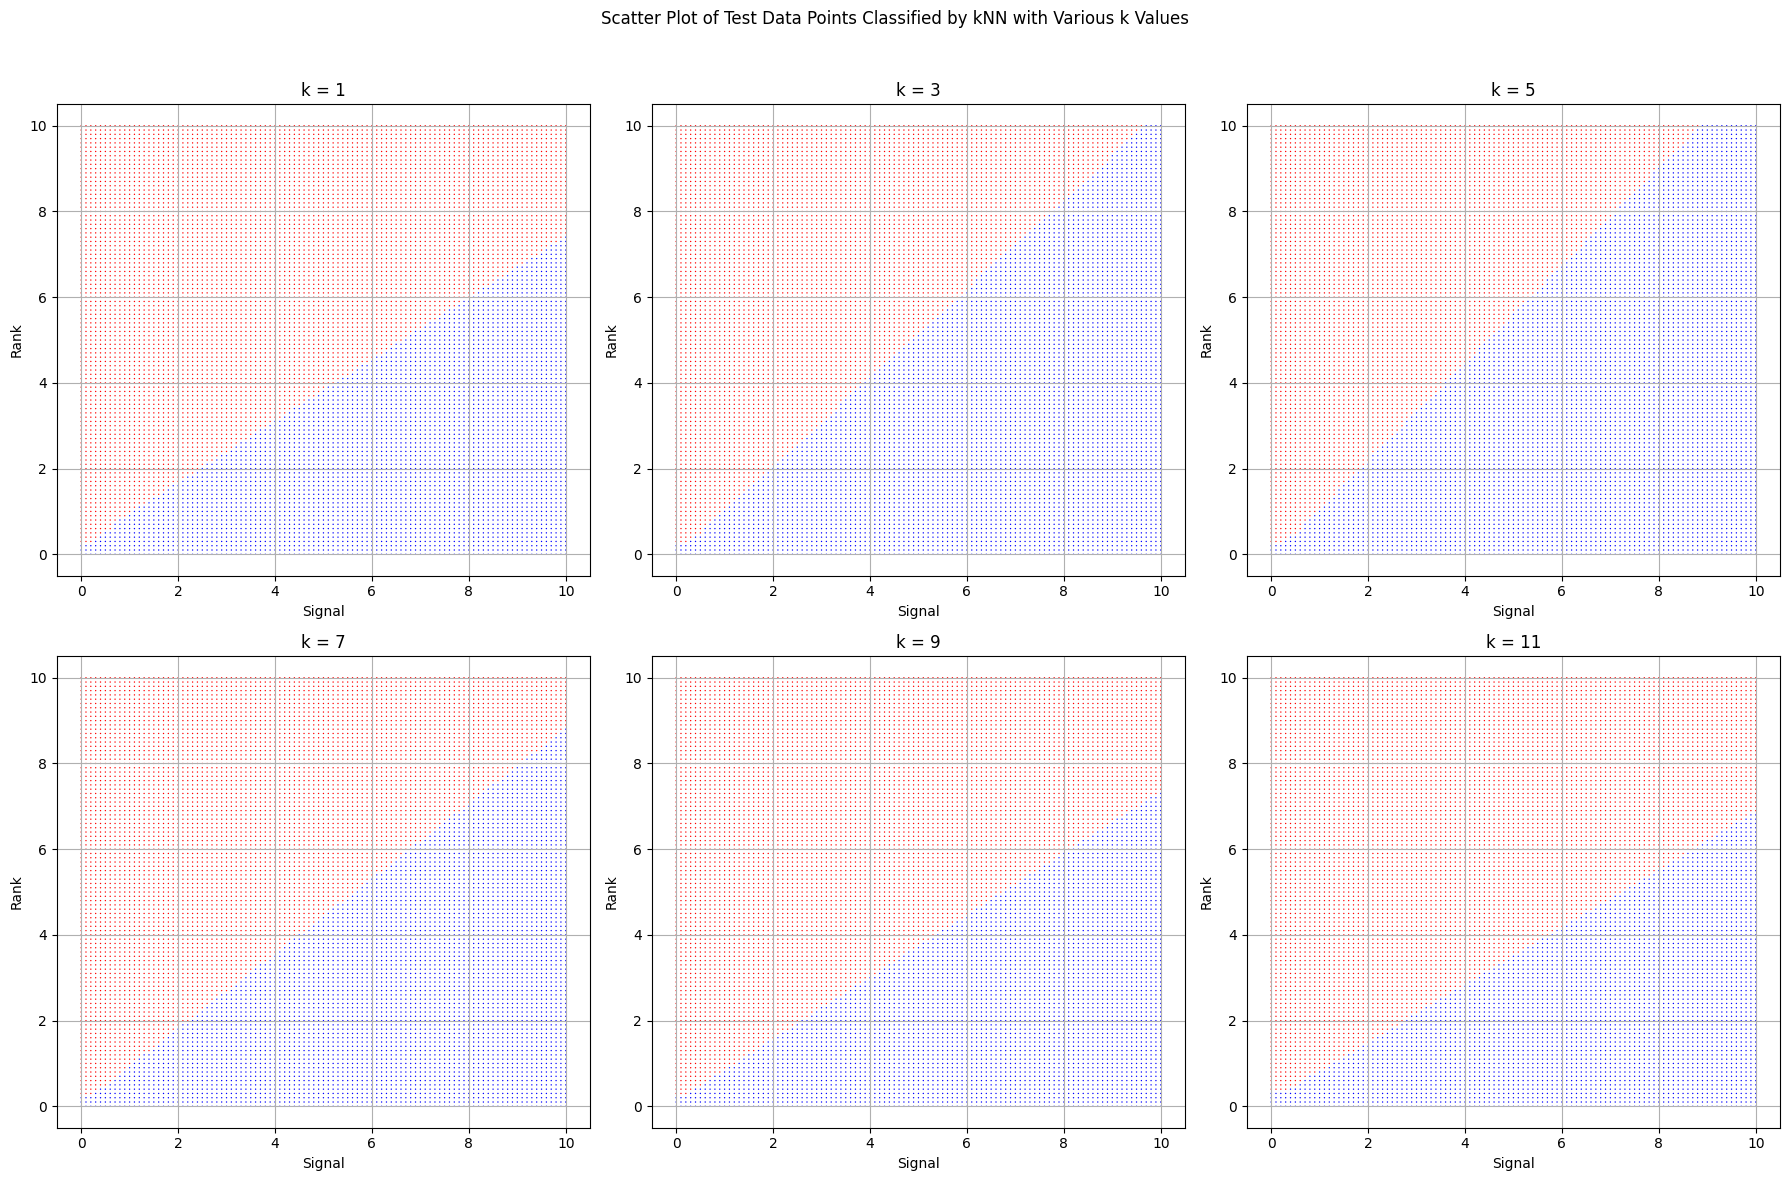

In [5]:
#a5
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

def load_data(file_path, sheet_name='Sheet1'):
    """Load the dataset from an Excel file."""
    data = pd.read_excel(file_path, sheet_name=sheet_name)
    return data

def preprocess_data(data):
    """Extract features and create binary labels."""
    signal_data = data['signal']
    rank_data = data['rank']
    X = pd.DataFrame({'signal': signal_data, 'rank': rank_data})
    y = (rank_data > rank_data.median()).astype(int)
    return X, y

def generate_test_grid(signal_range, rank_range, step=0.1):
    """Generate a grid of test data points."""
    signal_test_values = np.arange(signal_range[0], signal_range[1] + step, step)
    rank_test_values = np.arange(rank_range[0], rank_range[1] + step, step)
    signal_test_grid, rank_test_grid = np.meshgrid(signal_test_values, rank_test_values)
    signal_test_flat = signal_test_grid.flatten()
    rank_test_flat = rank_test_grid.flatten()
    return pd.DataFrame({'signal': signal_test_flat, 'rank': rank_test_flat})

def classify_and_plot(X_train, y_train, X_test_grid, k_values):
    """Train kNN classifiers with various k values and plot results."""
    plt.figure(figsize=(18, 12))
    for i, k in enumerate(k_values):
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train, y_train)
        y_test_pred = knn.predict(X_test_grid)
        colors = np.where(y_test_pred == 0, 'blue', 'red')
        plt.subplot(2, 3, i + 1)
        plt.scatter(X_test_grid['signal'], X_test_grid['rank'], c=colors, s=1, edgecolor='none')
        plt.title(f'k = {k}')
        plt.xlabel('Signal')
        plt.ylabel('Rank')
        plt.grid(True)
    plt.suptitle('Scatter Plot of Test Data Points Classified by kNN with Various k Values')
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

def main():
    """Main function to execute the steps."""
    file_path = r"C:\\Users\\srivar\\Desktop\\Feature Extraction using TF-IDF.xlsx"
    data = load_data(file_path)
    X, y = preprocess_data(data)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    X_test_grid = generate_test_grid(signal_range=(0, 10), rank_range=(0, 10))
    k_values = [1, 3, 5, 7, 9, 11]
    classify_and_plot(X_train, y_train, X_test_grid, k_values)

# Execute the main function

main()


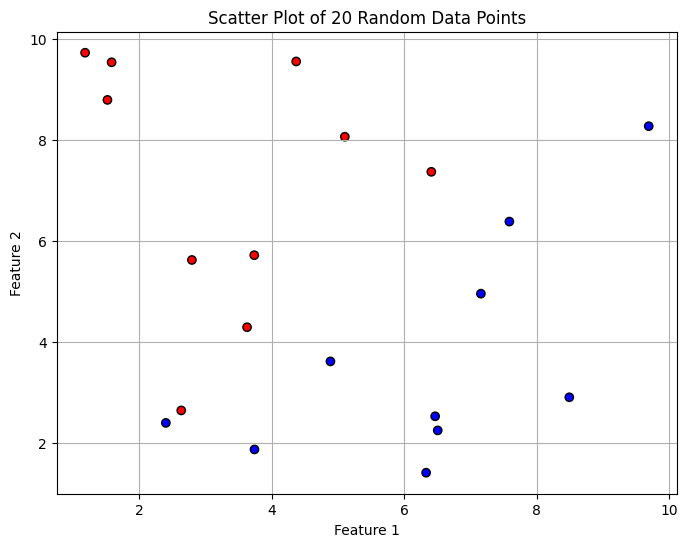

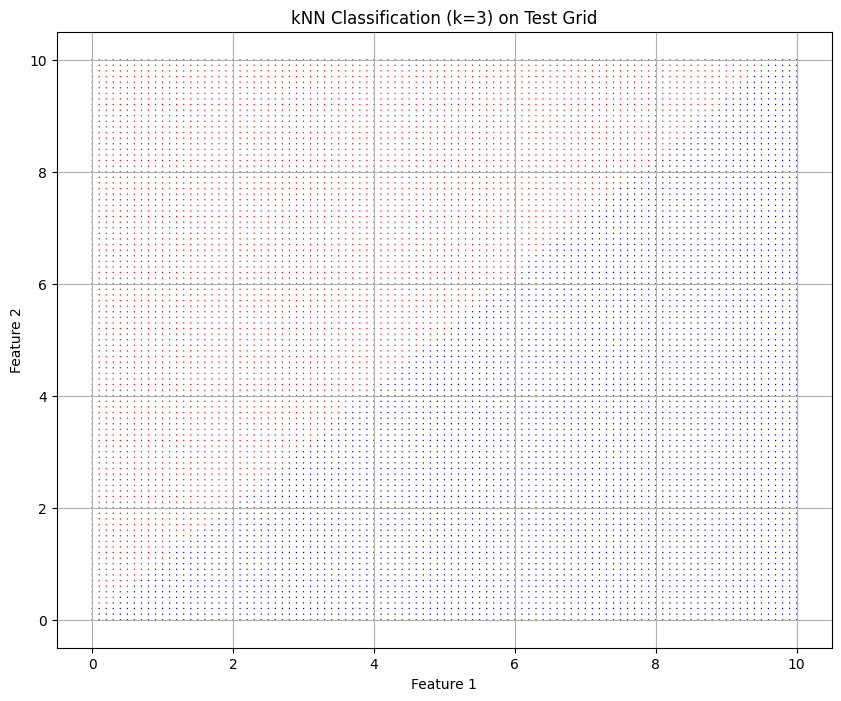

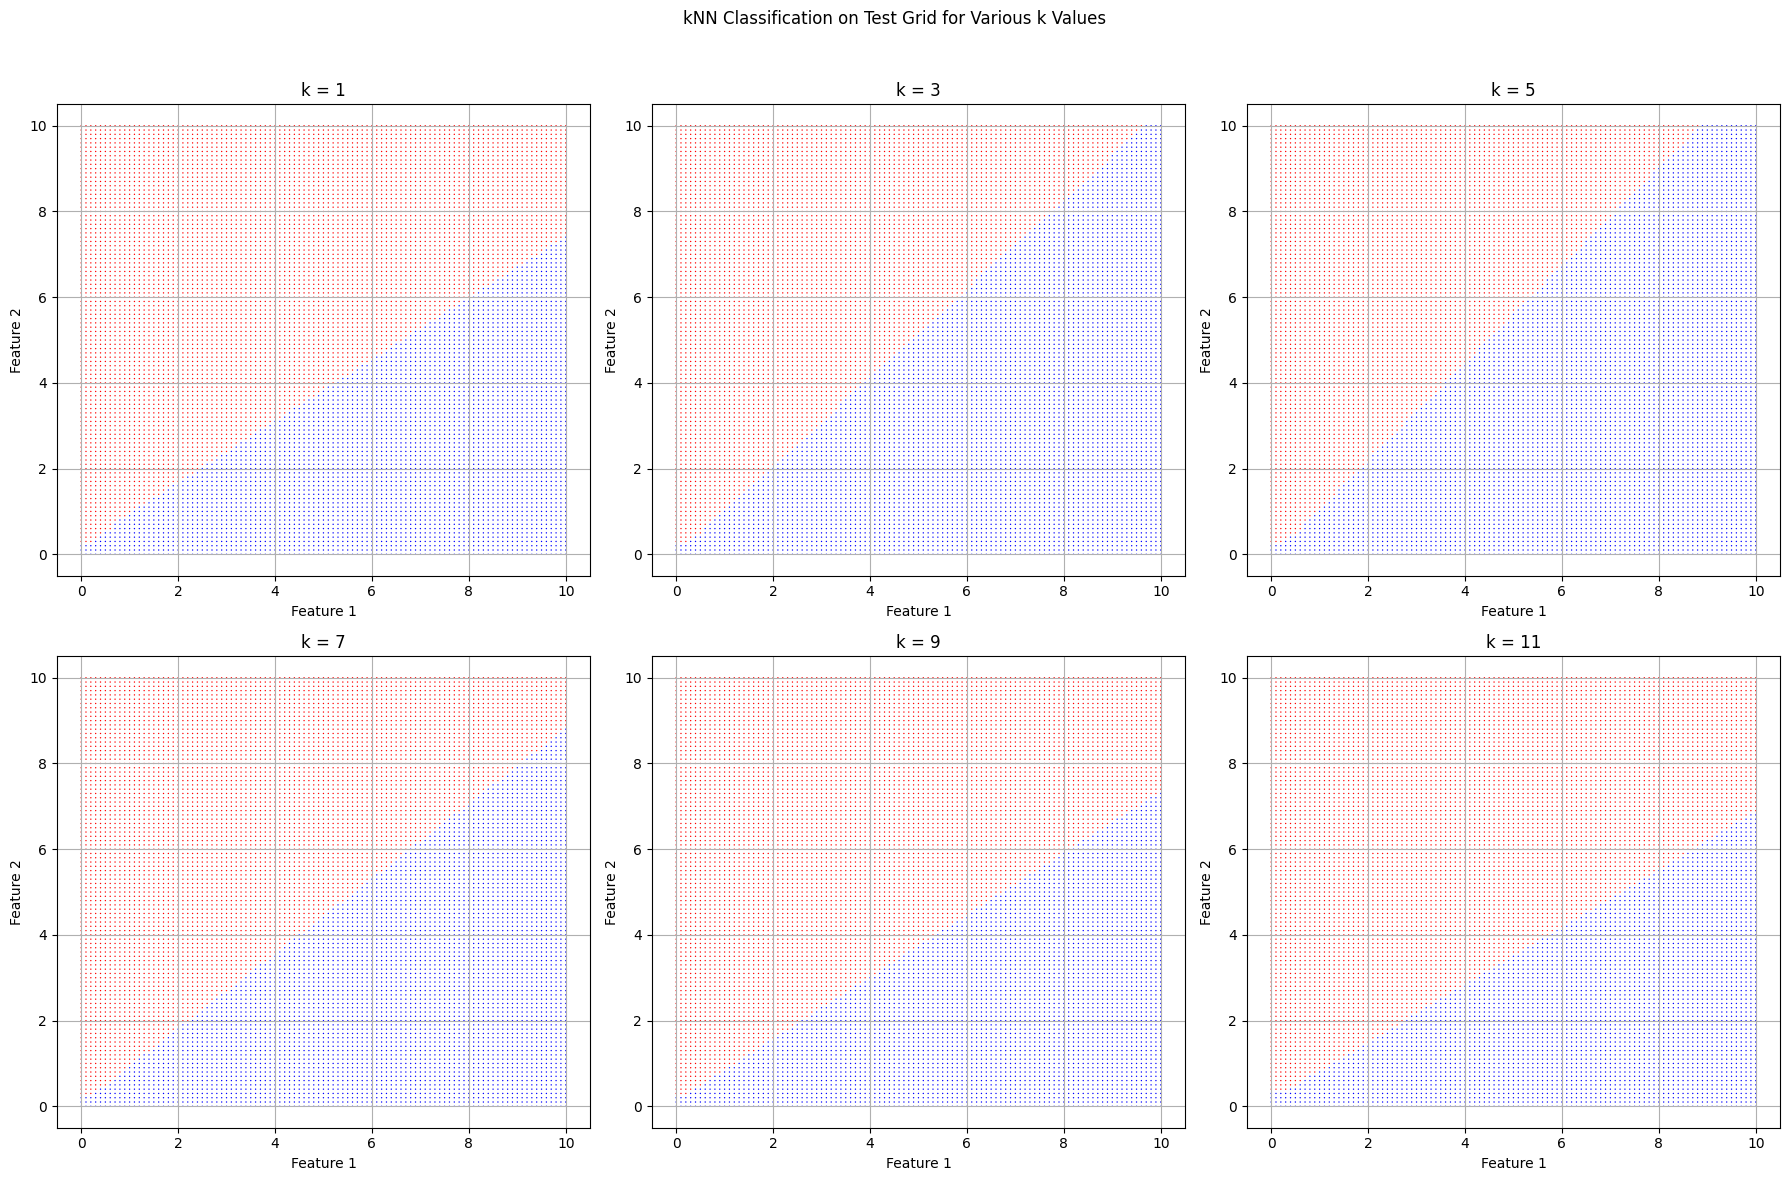

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

def load_data(file_path, sheet_name='Sheet1'):
    """Load the dataset from an Excel file."""
    data = pd.read_excel(file_path, sheet_name=sheet_name)
    return data

def preprocess_data(data, feature_1_name='signal', feature_2_name='rank'):
    """Extract features and create binary labels."""
    feature_1 = data[feature_1_name]
    feature_2 = data[feature_2_name]
    X = pd.DataFrame({'feature_1': feature_1, 'feature_2': feature_2})
    y = (feature_2 > feature_2.median()).astype(int)
    return X, y

def plot_sample_data(X_sample, y_sample):
    """Generate and plot random sample data."""
    plt.figure(figsize=(8, 6))
    plt.scatter(X_sample[:, 0], X_sample[:, 1], c=['blue' if label == 0 else 'red' for label in y_sample], edgecolor='k')
    plt.title('Scatter Plot of 20 Random Data Points')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.grid(True)
    plt.show()

def generate_test_grid(feature_1_range, feature_2_range, step=0.1):
    """Generate a grid of test data points."""
    feature_1_test_values = np.arange(feature_1_range[0], feature_1_range[1] + step, step)
    feature_2_test_values = np.arange(feature_2_range[0], feature_2_range[1] + step, step)
    feature_1_grid, feature_2_grid = np.meshgrid(feature_1_test_values, feature_2_test_values)
    feature_1_flat = feature_1_grid.flatten()
    feature_2_flat = feature_2_grid.flatten()
    return pd.DataFrame({'feature_1': feature_1_flat, 'feature_2': feature_2_flat})

def classify_and_plot(X_train, y_train, X_test_grid, k_values):
    """Train kNN classifiers with various k values and plot results."""
    plt.figure(figsize=(18, 12))
    for i, k in enumerate(k_values):
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train, y_train)
        y_test_pred = knn.predict(X_test_grid)
        colors = np.where(y_test_pred == 0, 'blue', 'red')
        plt.subplot(2, 3, i + 1)
        plt.scatter(X_test_grid['feature_1'], X_test_grid['feature_2'], c=colors, s=1, edgecolor='none')
        plt.title(f'k = {k}')
        plt.xlabel('Feature 1')
        plt.ylabel('Feature 2')
        plt.grid(True)
    plt.suptitle('kNN Classification on Test Grid for Various k Values')
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

def main():
    """Main function to execute the steps."""
    file_path = r"C:\\Users\\srivar\\Desktop\\Feature Extraction using TF-IDF.xlsx"

    data = load_data(file_path)
    X, y = preprocess_data(data)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    
    # A3: Generate and plot random sample data
    np.random.seed(42)
    X_sample = np.random.uniform(1, 10, (20, 2))
    y_sample = (X_sample[:, 1] > X_sample[:, 0]).astype(int)
    plot_sample_data(X_sample, y_sample)
    
    # A4: Generate test grid and classify using kNN for k=3
    X_test_grid = generate_test_grid(feature_1_range=(0, 10), feature_2_range=(0, 10))
    knn = KNeighborsClassifier(n_neighbors=3)
    knn.fit(X_train, y_train)
    y_test_pred = knn.predict(X_test_grid)
    colors = np.where(y_test_pred == 0, 'blue', 'red')
    plt.figure(figsize=(10, 8))
    plt.scatter(X_test_grid['feature_1'], X_test_grid['feature_2'], c=colors, s=1, edgecolor='none')
    plt.title('kNN Classification (k=3) on Test Grid')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.grid(True)
    plt.show()
    
    # A5: Repeat A4 for different values of k
    k_values = [1, 3, 5, 7, 9, 11]
    classify_and_plot(X_train, y_train, X_test_grid, k_values)

# Execute the main function
main()


Best parameters found:  {'n_neighbors': 1}
Best cross-validation score: 1.00

Test set classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        45
           1       1.00      1.00      1.00         2

    accuracy                           1.00        47
   macro avg       1.00      1.00      1.00        47
weighted avg       1.00      1.00      1.00        47

Test set accuracy: 1.00


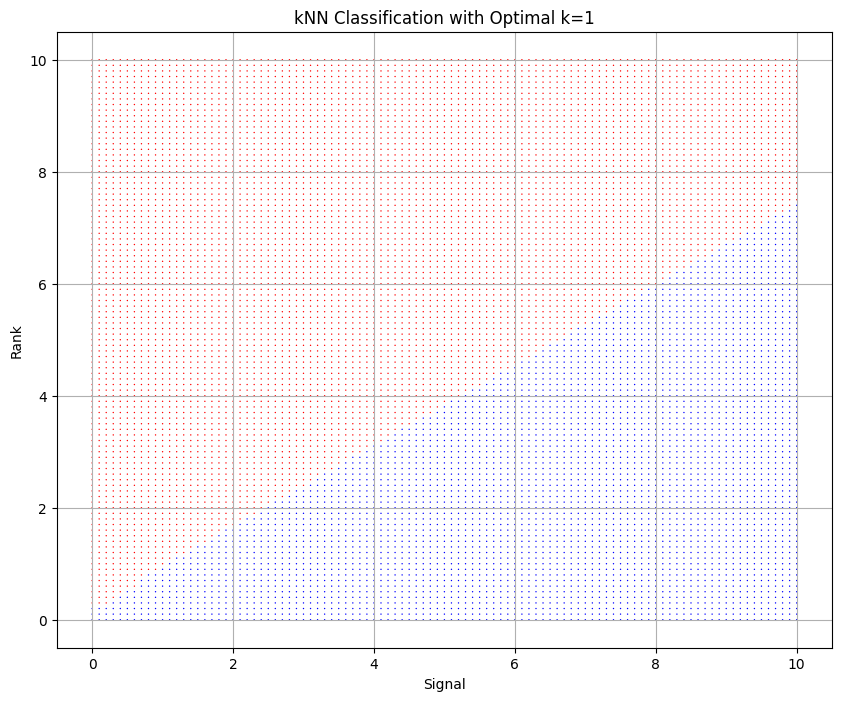

In [10]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt

def load_data(file_path, sheet_name='Sheet1'):
    """Load the dataset from an Excel file."""
    data = pd.read_excel(file_path, sheet_name=sheet_name)
    return data

def preprocess_data(data, feature_1_name='signal', feature_2_name='rank'):
    """Extract features and create binary labels."""
    feature_1 = data[feature_1_name]
    feature_2 = data[feature_2_name]
    X = pd.DataFrame({'signal': feature_1, 'rank': feature_2})
    y = (feature_2 > feature_2.median()).astype(int)
    return X, y

def perform_grid_search(X_train, y_train):
    """Perform grid search to find the best k for kNN."""
    param_grid = {
        'n_neighbors': list(range(1, 21))  # Trying k values from 1 to 20
    }
    knn = KNeighborsClassifier()
    grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_train)
    return grid_search

def evaluate_model(best_knn, X_test, y_test):
    """Evaluate the best model on the test set."""
    y_test_pred = best_knn.predict(X_test)
    print("\nTest set classification report:")
    print(classification_report(y_test, y_test_pred))
    print(f"Test set accuracy: {accuracy_score(y_test, y_test_pred):.2f}")

def generate_test_grid(feature_1_range, feature_2_range, step=0.1):
    """Generate a grid of test data points."""
    feature_1_test_values = np.arange(feature_1_range[0], feature_1_range[1] + step, step)
    feature_2_test_values = np.arange(feature_2_range[0], feature_2_range[1] + step, step)
    feature_1_grid, feature_2_grid = np.meshgrid(feature_1_test_values, feature_2_test_values)
    feature_1_flat = feature_1_grid.flatten()
    feature_2_flat = feature_2_grid.flatten()
    return pd.DataFrame({'signal': feature_1_flat, 'rank': feature_2_flat})

def plot_classification(X_test_grid, y_test_pred_grid, optimal_k):
    """Plot the test data points with predicted class colors."""
    colors = np.where(y_test_pred_grid == 0, 'blue', 'red')
    plt.figure(figsize=(10, 8))
    plt.scatter(X_test_grid['signal'], X_test_grid['rank'], c=colors, s=1, edgecolor='none')
    plt.title(f'kNN Classification with Optimal k={optimal_k}')
    plt.xlabel('Signal')
    plt.ylabel('Rank')
    plt.grid(True)
    plt.show()

def main(file_path):
    """Main function to execute the steps."""
    # Load and preprocess data
    data = load_data(file_path)
    X, y = preprocess_data(data)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # Perform grid search for the best k
    grid_search = perform_grid_search(X_train, y_train)
    print("Best parameters found: ", grid_search.best_params_)
    print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

    # Evaluate the best model
    best_knn = grid_search.best_estimator_
    evaluate_model(best_knn, X_test, y_test)

    # Generate and classify the test grid
    X_test_grid = generate_test_grid(feature_1_range=(0, 10), feature_2_range=(0, 10))
    y_test_pred_grid = best_knn.predict(X_test_grid)

    # Plot classification results
    plot_classification(X_test_grid, y_test_pred_grid, optimal_k=grid_search.best_params_["n_neighbors"])

# Execute the main function
file_path = r"C:\\Users\\srivar\\Desktop\\Feature Extraction using TF-IDF.xlsx"
main(file_path)
